TAREA 9.2 

Use el método compuesto de Simpson y el método compuesto del trapecio para encontrar la siguiente integral

$$
\int_0^4 \frac{dx}{\sqrt{x^2 + 16}}
$$

Compare con el resultado exacto para obtener el error cometido. Grafique el error en función de $h$ para ambos métodos y compare con las fórmulas de error.

El método compuesto del trapecio es:

$$
\int_a^b dx\,f(x) = \frac{h}{2}\left[f(a) + 2\sum_{i=1}^{n-1} f(x_i) + f(b)\right]- \frac{h^2 (b-a)}{12}f''(\mu)
$$

con los límites a = 0, y b = 4, luego la integral en esos puntos debe dar 0,88137, podemos ver
$$ n = 10, h = \frac{2}{5} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def funcion(x):
    return (1/np.sqrt((x**2) +16))
#0,88137 debería dar el valor real


#metodo compuesto del trapecio
def trapecio(f, a, b, n):
    h = (b - a)/n
    fx = f(np.linspace(a+h, b-h, n-1, endpoint=True))

    return (h/2)*(f(a) + 2*sum(fx) + f(b))


#comparar resultado
#graficar el error en función de h
trapecio(funcion, 0, 4, 10)

0.8810789225522291

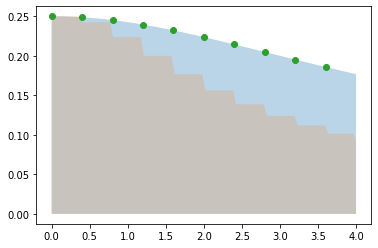

In [2]:
x = np.linspace(0,4,100)
plt.fill_between(x, (1/np.sqrt((x**2) +16)), alpha = 0.3)

h = 2/5
def poly(x):
    ind = int(x/h)
    return 1/((((ind)**2)+16)**0.5)
plt.fill_between(x, [poly(xi) for xi in x], alpha = 0.2)

xp = np.arange(10)*h
plt.scatter(xp, (1/((((xp)**2)+16)**0.5)))




[-0.00000000e+00 -8.32950801e-04 -2.12941869e-01 -5.44495018e+00
 -5.42134943e+01 -3.21804142e+02 -1.37672077e+03 -4.69703842e+03
 -1.35757145e+04 -3.45608384e+04 -7.95871872e+04 -1.68958569e+05
 -3.35335733e+05 -6.28871771e+05 -1.12361586e+06 -1.92527697e+06
 -3.18040214e+06 -5.08697967e+06 -7.90642692e+06 -1.19768658e+07
 -1.77275286e+07 -2.56940716e+07 -3.65345090e+07 -5.10454105e+07
 -7.01779418e+07 -9.50532591e+07 -1.26976710e+08 -1.67450237e+08
 -2.18182316e+08 -2.81094744e+08 -3.58325517e+08 -4.52227033e+08
 -5.65358838e+08 -7.00474092e+08 -8.60498962e+08 -1.04850413e+09
 -1.26766764e+09 -1.52122833e+09 -1.81242907e+09 -2.14444921e+09
 -2.52032552e+09 -2.94286107e+09 -3.41452153e+09 -3.93731842e+09
 -4.51267896e+09 -5.14130216e+09 -5.82300095e+09 -6.55653015e+09
 -7.33940029e+09 -8.16767716e+09 -9.03576718e+09 -9.93618888e+09
 -1.08593305e+10 -1.17931940e+10 -1.27231263e+10 -1.36315371e+10
 -1.44976051e+10 -1.52969722e+10 -1.60014260e+10 -1.65785725e+10
 -1.69914982e+10 -1.71984

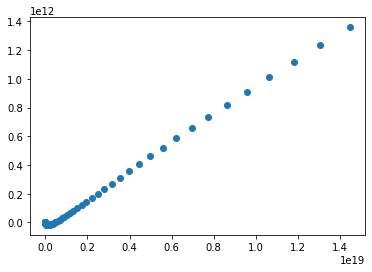

In [20]:

errt = ((h**2)*4/12)*((2*((x**2) - 8)/((16+(x**2))**(5/2))))
print(errt)
h = np.arange(100)*h
plt.scatter(h**2, errt)
  

Método compuesto de Simpson: 



$$
\int_a^b dx\,f(x) = \frac{h}{3}\left[f(a) + 2\sum_{i=1}^{n/2-1} f(x_{2i}) + 4\sum_{i=1}^{n/2} f(x_{2i-1}) + f(b)\right]- \frac{h^4 (b-a)}{180}f''(\mu)
$$



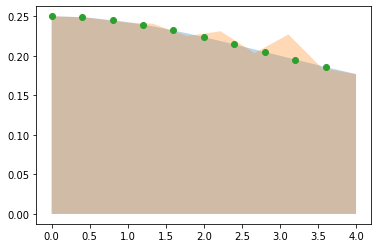

In [3]:
x = np.linspace(0,4,10)
plt.fill_between(x, (1/(np.sqrt(((x)**2)+16))), alpha = 0.3)

h = 2/5
def poly(x):
    ind = int(x/(2*h))
    Lo = (x - h*(2*ind+1))*(x - h*(2*ind+2))/(2*h*h)
    L1 = -(x - h*(2*ind))*(x - h*(2*ind+2))/(h*h)
    L2 = (x - h*(2*ind))*(x - h*(2*ind+1))/(2*h*h)
    return (1/(((2*h*ind)**2)+16)**0.5)*Lo + (1/((((h*(2*ind+1)))**2)+16)**0.5)*L1 + (1/((((h*(h*(2*ind+2)))**2)+16)**0.5))*L2
plt.fill_between(x, [poly(xi) for xi in x], alpha = 0.3)

xp = np.arange(10)*h
plt.scatter(xp, (1/(np.sqrt(((xp)**2)+16))))

El método compuesto de Simpson:

In [4]:
def simpson(f,a,b,n):
        h = (b - a)/n
        fx = f(np.linspace(a+h, b-h, n-1, endpoint=True))
        return (h/3)*(f(a) + 2*sum(2*fx+1) + 4*sum(2*fx-1) + f(b))


In [5]:
simpson(funcion, 0, 4, 100)

0.8570307832639769

[-8.88888889e-06 -8.40751143e-06 -7.10150753e-06 -5.31262647e-06
 -3.42642910e-06 -1.73648900e-06 -3.93869962e-07  5.71696517e-07
  1.20296463e-06  1.57134840e-06]


ValueError: x and y must be the same size

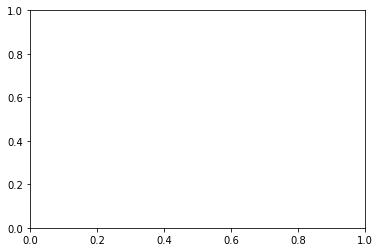

In [6]:

errs = ((h**4)*4/180)*((2*((x**2) - 8)/((16+(x**2))**(5/2))))
print(errs)
h = np.arange(100)*h
plt.scatter(h**4, errs)

ValueError: x and y must have same first dimension, but have shapes (100,) and (10,)

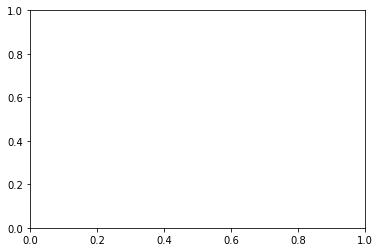

In [7]:
plt.plot(h, errs, label = 'error metodo de simpson')
plt.plot(h, errt, label = 'error metodo del trapecio')
plt.legend()

Se puede ver que el error es mayor con el método de Simpson, y si comparamos con el valor real como error relativo, tiene sentido. El valor real de la integral es 0.88137, y el error lo compararemos de unaa forma más simple y cotidiana:

In [8]:
e_rel_sim = abs((0.88137 - 0.8570307832639769)/0.88137)

In [9]:
e_rel_trap = abs((0.88137 - 0.8810789225522291)/0.88137)
e_rel_trap

0.00033025567896672724

# Calificacion: 7.0
